# Getting the audio files
* We send request with urllib.request to download a.tar.gz file

In [1]:
# import urllib.request
# urllib.request.urlretrieve ("https://goo.gl/8hY5ER","a.tar.gz")
# import tarfile
# tar = tarfile.open("a.tar.gz")
# tar.extractall()
# tar.close()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# os.remove("a.tar.gz")

# Metadata DataFrame View

In [3]:
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


# Sample Visualisation

In [4]:
### Let's read a sample audio using librosa
import librosa
audio_file_path=r'C:\Users\Emincan\Desktop\Projects\Global-AI-Hub-Team-Project\UrbanSounds8K\UrbanSound8K\audio\fold1\101415-3-0-2.wav'
# audio_file_path='/content/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [5]:
print(librosa_audio_data)

[-0.00011662 -0.00017163 -0.00017833 ... -0.04541198 -0.04675572
 -0.05040179]


In [6]:
"""
def create_spectrogram(y):
  spec = librosa.feature.melspectrogram(y=y)
  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv
"""
# We get spectrograms with different ways

'\ndef create_spectrogram(y):\n  spec = librosa.feature.melspectrogram(y=y)\n  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)\n  return spec_conv\n'

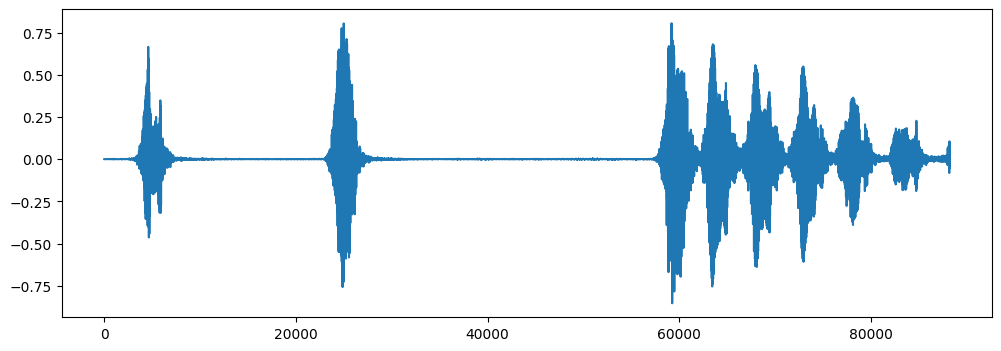

In [7]:
###  plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data);

## Read with Scipy

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [9]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

## Original audio with 2 channel

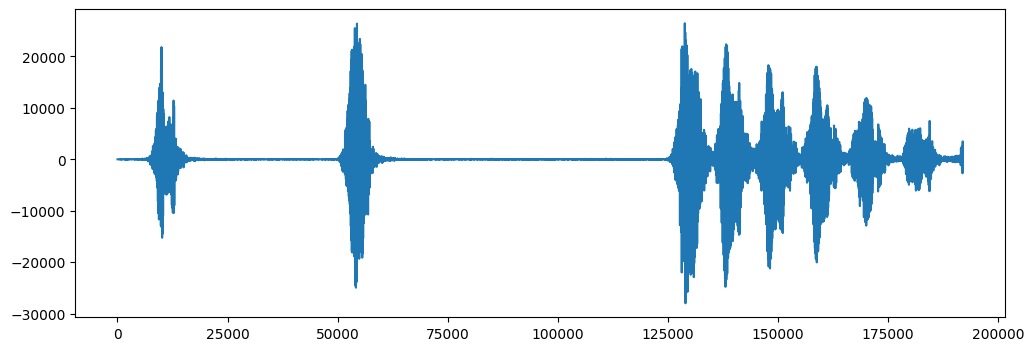

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio);

In [11]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [12]:
mfccs

array([[-5.2506287e+02, -5.1955383e+02, -5.1863977e+02, ...,
        -4.3568246e+02, -3.8561288e+02, -3.0827991e+02],
       [ 9.1997910e+00,  1.6759438e+01,  1.8103901e+01, ...,
         1.1375922e+02,  1.4781424e+02,  1.3629199e+02],
       [ 8.8354816e+00,  1.5750098e+01,  1.7259289e+01, ...,
         6.4274628e+01,  4.9134655e+01,  3.2146011e+01],
       ...,
       [ 4.3310225e-01, -3.5408967e+00, -4.8356514e+00, ...,
        -5.2699137e+00, -1.6015506e-01,  5.9511268e-01],
       [ 4.4527557e-01, -3.2774944e+00, -4.6472969e+00, ...,
        -3.4224114e+00,  3.9338789e+00,  7.3076093e-01],
       [ 3.5710910e-01, -2.9899125e+00, -4.4125967e+00, ...,
        -2.6713367e+00,  2.7566633e+00, -5.4228485e-02]], dtype=float32)

In [13]:
audio_dataset_path ='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

## Feature Extraction

* We divides the data by extracting the characteristics of the frequencies

In [15]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [01:55, 30.96it/s]c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8321it [04:24, 40.01it/s]c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8327it [04:24, 44.80it/s]c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [04:36, 31.60it/s]


## Our Final DataFrame

In [16]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [17]:
# Our features and label.
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [18]:
X.shape

(8732, 40)

In [19]:
# Label Encoding
y=np.array(pd.get_dummies(y))

In [20]:
y.shape

(8732, 10)

In [21]:
### Train/Test/Val Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=53)
X_test , X_val , y_test , y_val = train_test_split(X_test,y_test , test_size = 0.4 , random_state =53)

In [22]:
print(f"X_train---------: {X_train}")
print(f"y---------------: {y}")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train---------: [[-4.4660352e+02  1.1368541e+02 -5.2402218e+01 ...  2.0793355e+00
   1.1161355e+00  4.3718461e-02]
 [-3.4466641e+02  8.1548080e+01  1.0016554e+01 ...  2.2427995e+00
  -1.3785095e+00  2.3533483e-01]
 [-3.0478070e+02  1.6254568e+01 -2.3844900e+01 ...  5.0087671e+00
  -1.5540754e+00  5.5810905e+00]
 ...
 [-3.5567734e+02  1.5805850e+02 -9.9176035e+00 ... -2.0883915e+00
  -2.9937372e+00 -3.6237228e+00]
 [-7.5334724e+01  7.3310951e+01 -2.7474356e+01 ... -1.7935060e+00
  -3.3400061e+00  2.8595352e+00]
 [-4.3270258e+02  1.4079111e+02 -5.3869976e+01 ... -2.6685240e-02
  -5.1870644e-01 -4.2102008e+00]]
y---------------: [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
X_train.shape: (6985, 40)
X_test.shape: (1048, 40)
X_val.shape: (699, 40)
y_test.shape: (1048, 10)


# Modelling Time

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [24]:
# This will be our output layer dense
num_labels=y.shape[1]

In [25]:
model=Sequential()
# First layer
model.add(Dense(1024,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Fourth layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Last layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               2

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 2000
num_batch_size = 50
checkpointer = ModelCheckpoint(filepath='Models/audio_classification2.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=1)


Epoch 1/2000
139/140 [============================>.] - ETA: 0s - loss: 4.7557 - accuracy: 0.1551
Epoch 1: val_loss improved from inf to 2.14247, saving model to Models\audio_classification2.hdf5
140/140 [==============================] - 2s 10ms/step - loss: 4.7430 - accuracy: 0.1548 - val_loss: 2.1425 - val_accuracy: 0.1989
Epoch 2/2000
139/140 [============================>.] - ETA: 0s - loss: 2.1481 - accuracy: 0.2246
Epoch 2: val_loss improved from 2.14247 to 2.00219, saving model to Models\audio_classification2.hdf5
140/140 [==============================] - 1s 10ms/step - loss: 2.1481 - accuracy: 0.2252 - val_loss: 2.0022 - val_accuracy: 0.3548
Epoch 3/2000
139/140 [============================>.] - ETA: 0s - loss: 2.0388 - accuracy: 0.2629
Epoch 3: val_loss improved from 2.00219 to 1.87390, saving model to Models\audio_classification2.hdf5
140/140 [==============================] - 1s 10ms/step - loss: 2.0392 - accuracy: 0.2628 - val_loss: 1.8739 - val_accuracy: 0.3662
Epoch 4/

<Axes: >

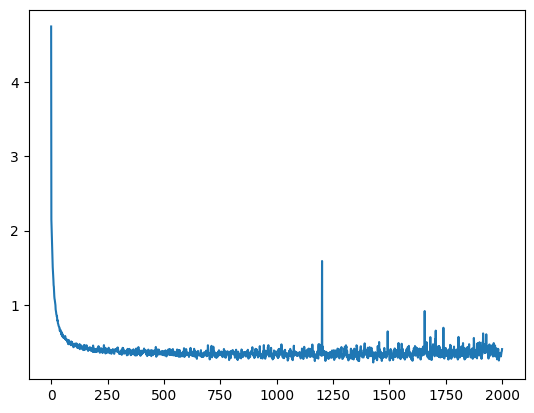

In [38]:
import seaborn as sns

sns.lineplot(x = np.arange(num_epochs) , y = model.history.history['loss'])

In [39]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9227099418640137


In [ ]:
# Done